<a href="https://colab.research.google.com/github/MartinSantaGitHub/curso-estadistica-multivariante/blob/master/Seccion%208%20Clusterizacion/Codigos/5.%20Python_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterización con K-Means


## 1. Vamos a implementar K-Means sobre Iris Dataset

---

**Ejercicio:** Implementa una función ***Kmeans($x_1$, $x_2$, $k$, $dist$, $max_iter$)***  que implemente el algoritmo de clusterización K-Means sobre la primera y segunda variable del dataset Iris Setosa (el de las flores ✿), suponiendo que no sabemos su clasificación en tres grupos de flores. 

Recuerda que las variables deben ser estandarizadas, (importante cuando trabajamos con distancias). Visualiza las posiciones de los centroides inicializados aleatoriamente (en este caso el método óptimo para estimar esos centroides iniciales sería usar Kmeans++, cosa que puedes hacer como ***bonus***). 

En la función implementada, se repetirán tantas iteraciones de la actualización de la posición de los centroides como indique el parámetro $max_iters$, el número máximo de iteraciones. 

Implementaciones más avanzadas utilizarían métodos que comprueben si el algoritmo ha convergido para decidir si dejar de iterar. Esto no es necesario en este caso. Visualiza la posición de los clusters en cada iteración y con colores señala a cuál pertenece cada observación.

La misión será implementar la lógica del algoritmo de K-Means. Devuelve el vector de centroides actualizado. 

**(Bonus)** Busca la función en Python para aplicar K-means y usa como centroides iniciales el método Kmeans++.

In [1]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import pandas  as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris

# Cargamos los datos
X = load_iris().data

In [2]:
n, p = X.shape

def Kmeans(x1, x2, k, dist, max_iters=30, viz=True):
  
 
  colors = ["blue", "green", "red", "orange", "yellow", "skyblue", "lightgreen", "salmon"]
  
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T

  # Visualiza la posición de los centroides.
  for c in range(k):
    if viz: plt.plot(centr[c, 0], centr[c, 1], marker="X", markersize=15, c=colors[c])

  # Visualiza la nube de datos.
  if viz: plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)
  if viz: plt.show()
  
  ### Implementemos K-means ###
  
  for iter in range(max_iters):

    distances = []

    for c in centr:
      # Guardamos las distancias de cada punto a cada centroide.
      distances.append([dist(c, [x1[i,0], x2[i,0]]) for i in range(x1.shape[0])])

    # Asignamos a cada datapoint al cluster más cercano.
    c_indexes = np.argmin(distances, axis=0)

    for c in range(k):

      # Visualizamos de cada color la nube de puntos seleccionada.
      if viz: p = plt.scatter(x1[c_indexes == c, 0],  
                              x2[c_indexes == c, 0], alpha=0.5, c=colors[c])

      if viz: plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
      
      # Actualizamos la posición del centroide.
      centr[c, 0] = np.mean(x1[c_indexes == c, 0]) if np.sum(x1[c_indexes == c, 0]) != 0 else 0
      centr[c, 1] = np.mean(x2[c_indexes == c, 0]) if np.sum(x2[c_indexes == c, 0]) != 0 else 0
    
    plt.show()
    
  return centr, c_indexes, np.array(distances)  
  


In [3]:
# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

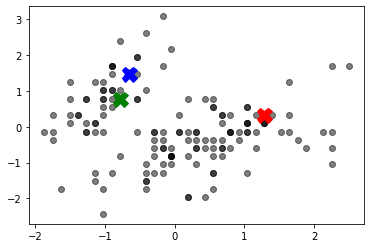

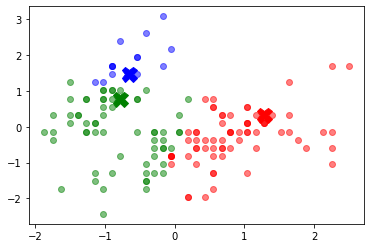

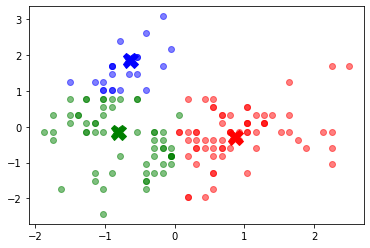

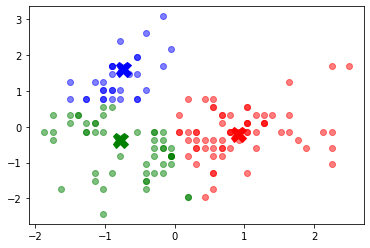

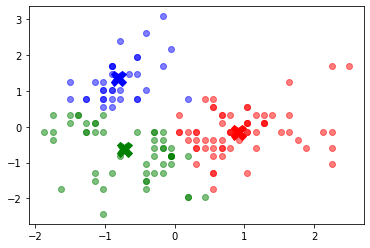

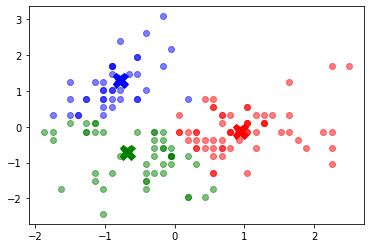

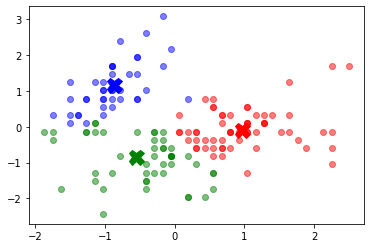

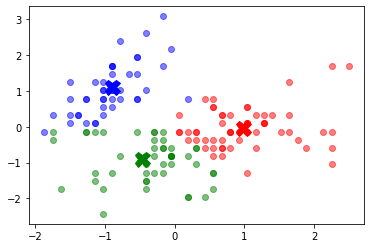

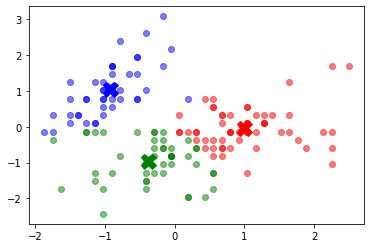

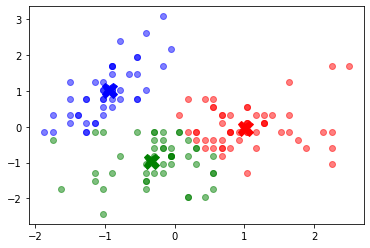

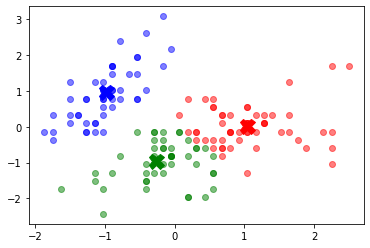

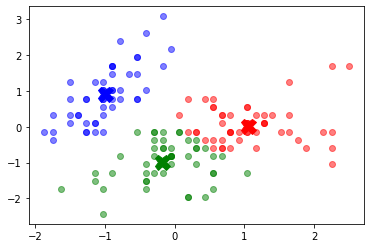

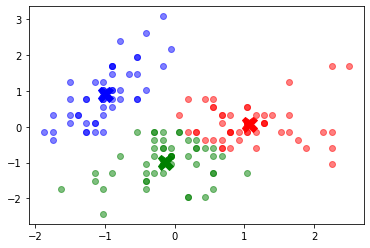

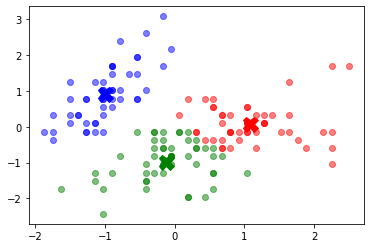

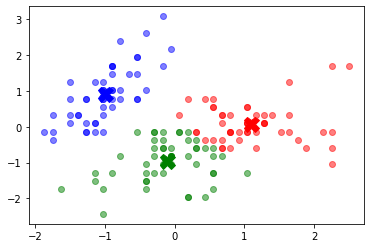

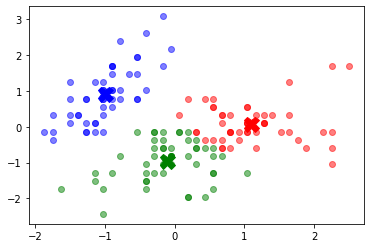

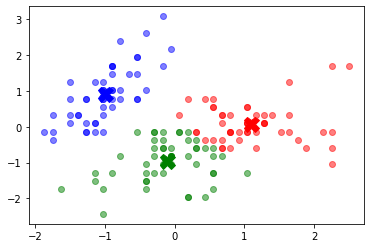

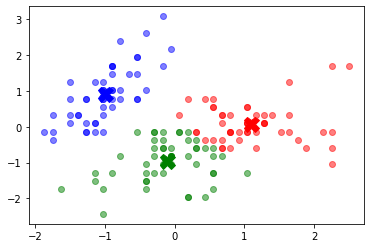

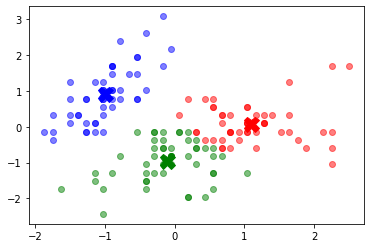

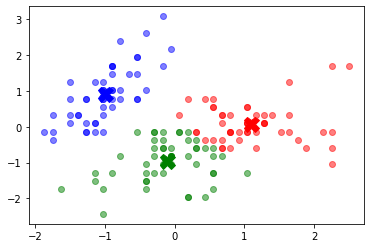

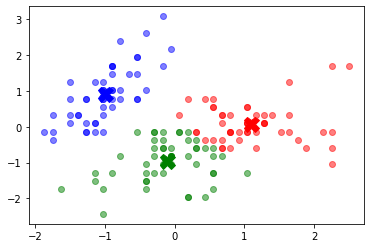

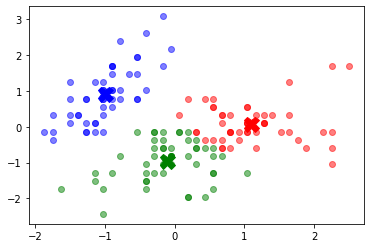

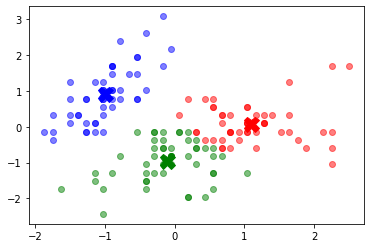

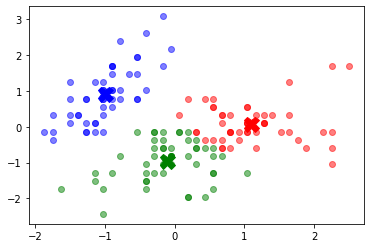

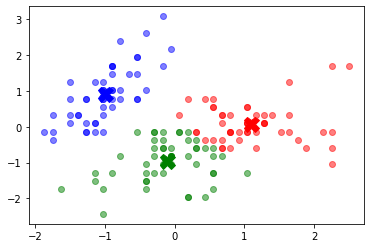

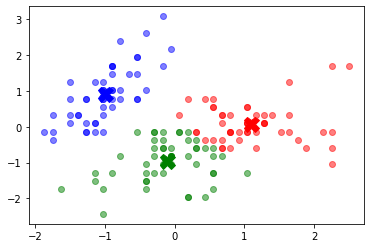

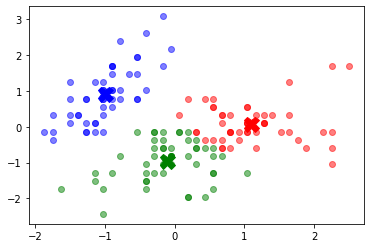

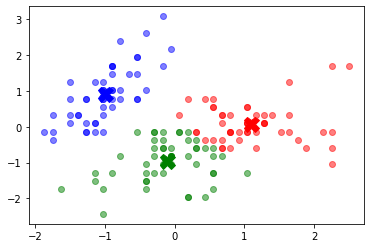

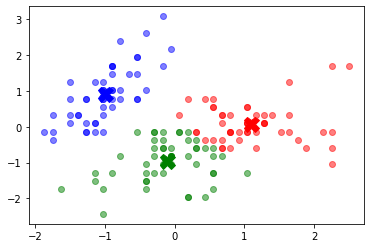

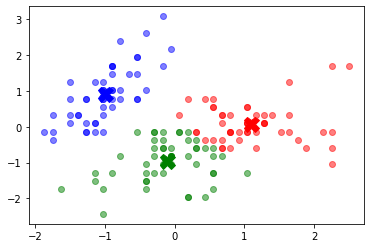

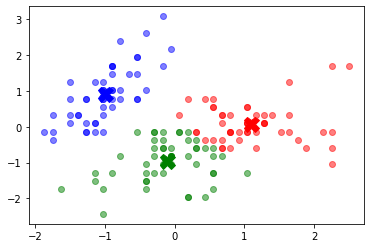

In [5]:
 # Visualizamos la función:
centr, Y, distances = Kmeans(X[:, 0:1], X[:, 1:2], 3, dist, viz=True)

In [6]:
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
X_features = iris.data[:, :2]
y_labels = iris.target
km = KMeans(n_clusters = 3, init='k-means++')
km.fit(X_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# Centros 
centers = km.cluster_centers_
print(centers)


[[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.428     ]]


Text(0.5, 1.0, 'Kmeans')

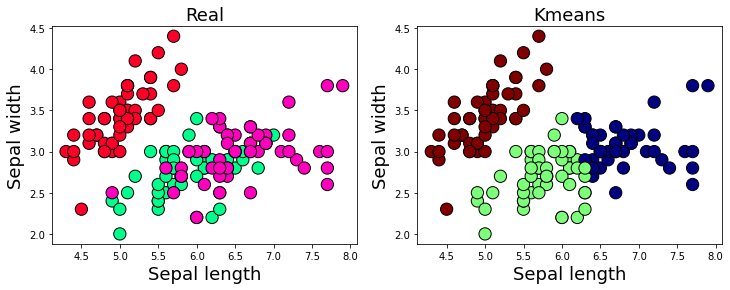

In [8]:
# Comparemos la clasificación que tenemos con la obtenida por Kmean++

new_labels = km.labels_

# Plot 

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].scatter(X[:, 0], X[:, 1], c=y_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].set_title('Real', fontsize=18)
axes[1].set_title('Kmeans', fontsize=18)

In [ ]:
y_labels

In [11]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)